In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt


descriptive_stats = {}

# Finding all CSV files that begin with 'crypto_task'
file_pattern = "/home/estella/Projects/tsa_crt/saved_data/crypto_task*.csv"
files = glob.glob(file_pattern)


for file in files:
    df = pd.read_csv(file)
    file_key = file.split('/')[-1]  
    descriptive_stats[file_key] = df.describe()


descriptive_stats_combined = {}

for name, stats in descriptive_stats.items():

    relevant_stats = stats.loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max'], ['open', 'high', 'low', 'close']]
    descriptive_stats_combined[name] = relevant_stats


combined_stats_df = pd.concat(descriptive_stats_combined, axis=1)



In [2]:


mean_values = {}


file_pattern = "/home/estella/Projects/tsa_crt/saved_data/crypto_task*.csv"
files = glob.glob(file_pattern)


for file in files:
    df = pd.read_csv(file)
    file_key = file.split('/')[-1] 
    mean_values[file_key] = df[['open', 'high', 'low', 'close']].mean()


mean_values_df = pd.DataFrame(mean_values)

mean_values_df = mean_values_df.T


print(mean_values_df)

                             open          high           low         close
crypto_task_eth.csv   1020.825208   1057.668198    977.582990   1021.769179
crypto_task_ltc.csv    101.344359    106.030772     96.187306    101.411342
crypto_task_xmr.csv    142.307689    148.661906    135.443111    142.389179
crypto_task_xrp.csv      0.508834      0.534423      0.481311      0.509206
crypto_task_btc.csv  18605.681616  19146.417886  17988.786752  18621.985706


In [3]:



file_pattern = "/home/estella/Projects/tsa_crt/saved_data/crypto_task*.csv"
files = glob.glob(file_pattern)


for file in files:
    df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y")


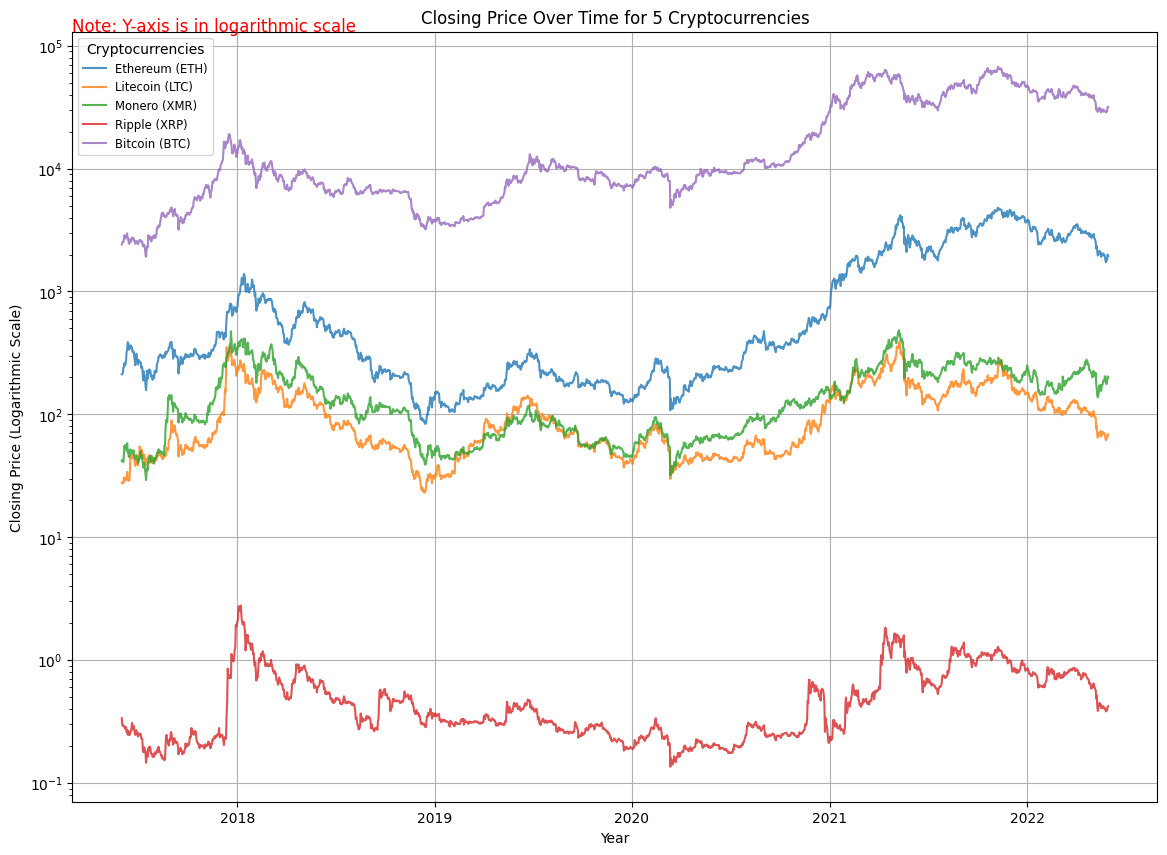

In [4]:



file_pattern = "/home/estella/Projects/tsa_crt/saved_data/crypto_task*.csv"
files = glob.glob(file_pattern)

file_label_mapping = {
    'crypto_task_btc.csv': 'Bitcoin (BTC)',
    'crypto_task_eth.csv': 'Ethereum (ETH)',
    'crypto_task_ltc.csv': 'Litecoin (LTC)',
    'crypto_task_xmr.csv': 'Monero (XMR)',
    'crypto_task_xrp.csv': 'Ripple (XRP)'
}


plt.figure(figsize=(14, 10))

for idx, file in enumerate(files):
    df = pd.read_csv(file)
    file_key = file.split('/')[-1]  
    label = file_label_mapping.get(file_key, file_key)  
    

    df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y")
    

    if df['close'].isnull().any():
        print(f"Warning: Missing values found in 'close' column of {file_key}")
    

    plt.plot(df['date'], df['close'], label=label, alpha=0.8)


plt.xlabel('Year')
plt.ylabel('Closing Price (Logarithmic Scale)')
plt.title('Closing Price Over Time for 5 Cryptocurrencies')
plt.yscale('log')
plt.text(plt.xlim()[0], plt.ylim()[1], 'Note: Y-axis is in logarithmic scale', fontsize=12, color='red', ha='left')
plt.legend(title="Cryptocurrencies", loc='upper left', fontsize='small')
plt.grid(True)
plt.show()


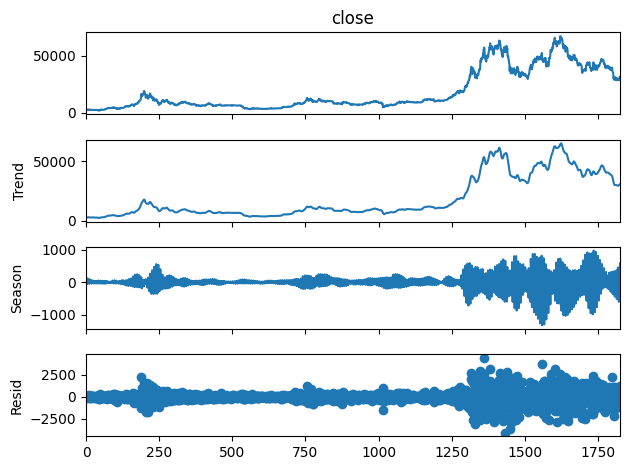

In [5]:
from statsmodels.tsa.seasonal import STL

period = 7

stl = STL(df['close'], seasonal=13, trend=13, low_pass=13, period=period)
result = stl.fit()
result.plot()
plt.show()

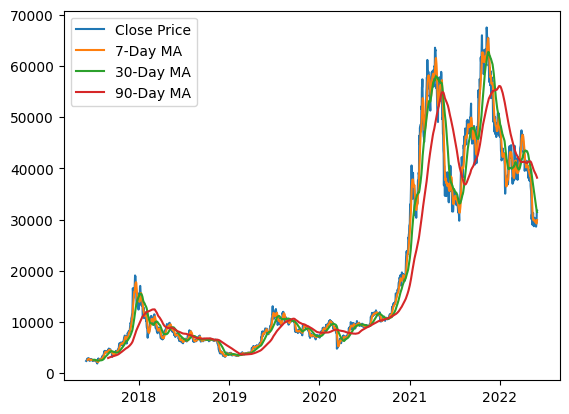

In [6]:
df['7_day_ma'] = df['close'].rolling(window=7).mean()
df['30_day_ma'] = df['close'].rolling(window=30).mean()
df['90_day_ma'] = df['close'].rolling(window=90).mean()
plt.plot(df['date'], df['close'], label='Close Price')
plt.plot(df['date'], df['7_day_ma'], label='7-Day MA')
plt.plot(df['date'], df['30_day_ma'], label='30-Day MA')
plt.plot(df['date'], df['90_day_ma'], label='90-Day MA')
plt.legend()
plt.show()

In [8]:
import pandas as pd


df = pd.read_csv("metrics_file.csv")


average_metrics = df.iloc[1:].mean()

print(average_metrics)


FileNotFoundError: [Errno 2] No such file or directory: 'metrics_file.csv'

In [ ]:

aggregated_metrics = all_metrics_df.groupby('Model').mean()


print(aggregated_metrics)


                              Unnamed: 0       MSE       MAE      RMSE  \
Model                                                                    
GRU-close-btc-w30-h0-12m             1.5  0.000626  0.018744  0.024471   
GRU-close-eth-w30-h0-12m             1.5  0.001008  0.024572  0.030869   
GRU-close-ltc-w30-h0-12m             1.5  0.000440  0.014502  0.019323   
GRU-close-xmr-w30-h0-12m             1.5  0.000634  0.018950  0.024268   
GRU-close-xrp-w30-h0-12m             1.5  0.000269  0.011444  0.015299   
gru-btc-close-w30-h0-12m.csv         5.5  0.000623  0.018712  0.024387   
gru-eth-close-w30-h0-12m.csv         5.5  0.001009  0.024521  0.030873   
gru-ltc-close-w30-h0-12m.csv         5.5  0.000440  0.014552  0.019263   
gru-xmr-close-w30-h0-12m.csv         5.5  0.000629  0.018758  0.024121   
gru-xrp-close-w30-h0-12m.csv         5.5  0.000268  0.011377  0.015292   

                                  MAPE        R2  
Model                                             
GRU-close

In [ ]:
best_mse_model = aggregated_metrics['MSE'].idxmin()
print(f"Best model by MSE: {best_mse_model} with MSE = {aggregated_metrics['MSE'].min()}")


Best model by MSE: gru-xrp-close-w30-h0-12m.csv with MSE = 0.00026797354235032184


In [ ]:
best_r2_model = aggregated_metrics['R2'].idxmax()
print(f"Best model by R-Squared: {best_r2_model} with R2 = {aggregated_metrics['R2'].max()}")


NameError: name 'aggregated_metrics' is not defined

In [ ]:
ranked_by_mae = aggregated_metrics['MAE'].sort_values()
print("Models ranked by MAE:")
print(ranked_by_mae)


NameError: name 'aggregated_metrics' is not defined

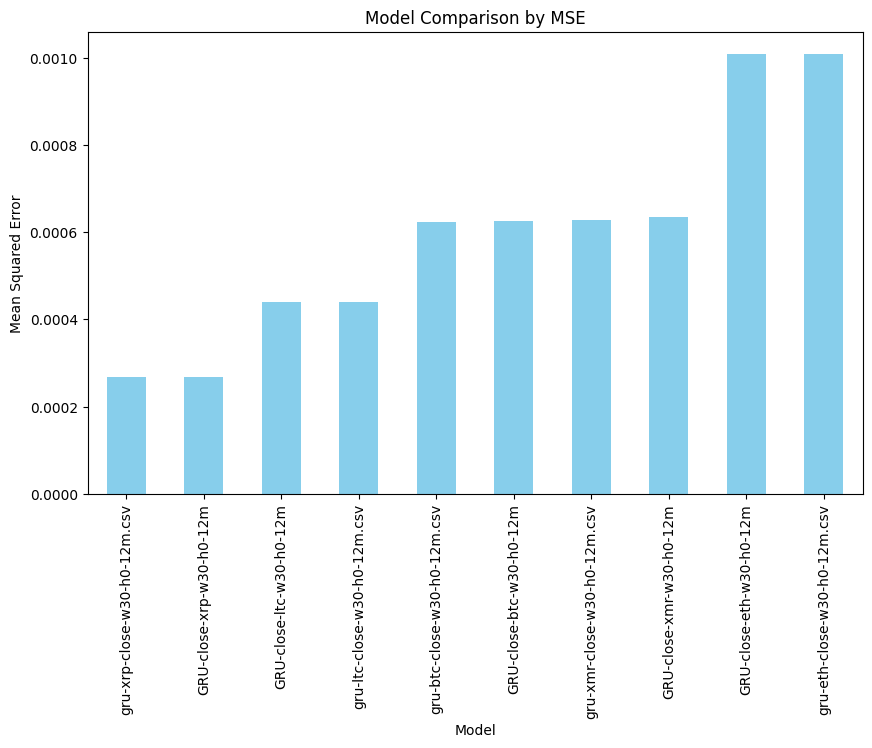

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
aggregated_metrics['MSE'].sort_values().plot(kind='bar', color='skyblue')
plt.title('Model Comparison by MSE')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.show()


Model
GRU-close-btc-w30-h0-12m        2.881815e-06
GRU-close-eth-w30-h0-12m        5.203588e-06
GRU-close-ltc-w30-h0-12m        4.809317e-07
GRU-close-xmr-w30-h0-12m        1.651738e-06
GRU-close-xrp-w30-h0-12m        1.172394e-06
gru-btc-close-w30-h0-12m.csv    2.633913e-04
gru-eth-close-w30-h0-12m.csv    5.137613e-04
gru-ltc-close-w30-h0-12m.csv    4.165449e-04
gru-xmr-close-w30-h0-12m.csv    3.910021e-04
gru-xrp-close-w30-h0-12m.csv    2.150046e-04
Name: MSE, dtype: float64


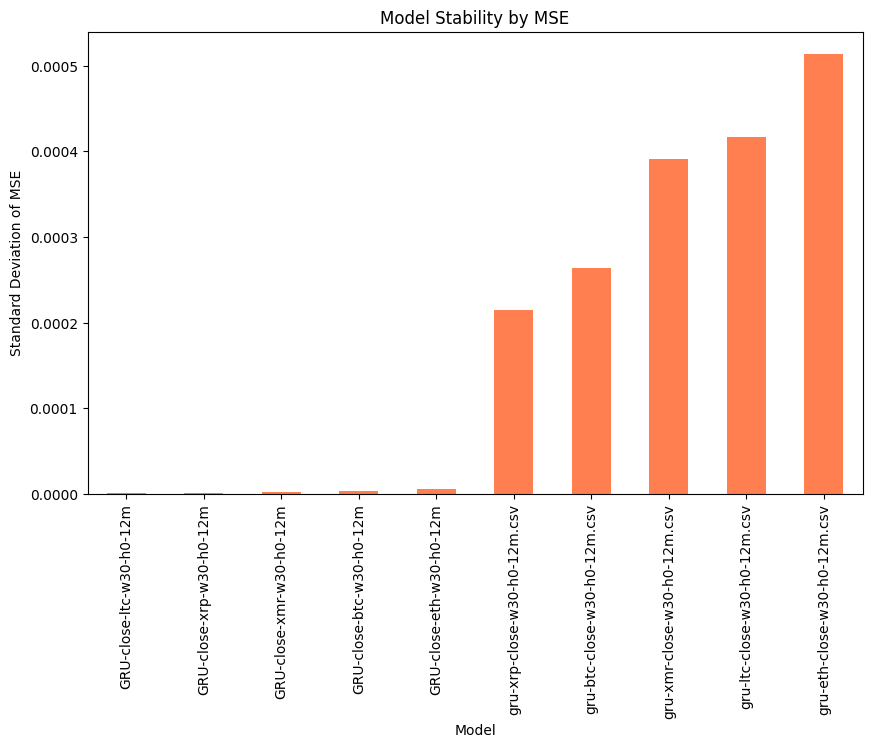

In [ ]:

stability_metrics = all_metrics_df.groupby('Model').std()

print(stability_metrics['MSE'])


plt.figure(figsize=(10, 6))
stability_metrics['MSE'].sort_values().plot(kind='bar', color='coral')
plt.title('Model Stability by MSE')
plt.ylabel('Standard Deviation of MSE')
plt.xlabel('Model')
plt.show()


In [ ]:
# Load and compare timing results
timing_files = [f for f in os.listdir(results_dir) if 'train_time' in f or 'inf_time' in f]

timing_dfs = []
for file in timing_files:
    df = pd.read_csv(os.path.join(results_dir, file))
    model_name = file.split('_')[1]  
    df['Model'] = model_name
    timing_dfs.append(df)

all_timing_df = pd.concat(timing_dfs, ignore_index=True)


avg_training_time = all_timing_df.groupby('Model')['Training Time'].mean()
print(avg_training_time)


plt.figure(figsize=(10, 6))
avg_training_time.sort_values().plot(kind='bar', color='lightgreen')
plt.title('Model Comparison by Average Training Time')
plt.ylabel('Training Time (seconds)')
plt.xlabel('Model')
plt.show()


NameError: name 'results_dir' is not defined

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt


results_dir = "/home/estella/Projects/tsa_crt/history"
output_plot_dir = "/home/estella/Projects/tsa_crt/history"


timing_files = [f for f in os.listdir(results_dir) if 'train_time' in f or 'inf_time' in f]


print(f"Timing files found: {timing_files}")


timing_dfs = []
for file in timing_files:
    file_path = os.path.join(results_dir, file)
    

    try:
        df = pd.read_csv(file_path)
        if df.empty:
            print(f"Warning: {file} is empty. Skipping.")
            continue

        model_name = file.split('_')[1]
        

        df['Model'] = model_name
        

        timing_dfs.append(df)
        print(f"Processed file: {file}")
        
    except pd.errors.EmptyDataError:
        print(f"Error: {file} is empty or unreadable. Skipping.")
    except Exception as e:
        print(f"Error reading {file}: {e}")


if not timing_dfs:
    print("No valid timing files were processed.")
else:

    all_timing_df = pd.concat(timing_dfs, ignore_index=True)
    
    avg_training_time = all_timing_df.groupby('Model')['Training Time'].mean()
    print(avg_training_time)


    plt.figure(figsize=(10, 6))
    avg_training_time.sort_values().plot(kind='bar', color='lightgreen')
    plt.title('Model Comparison by Average Training Time')
    plt.ylabel('Training Time (seconds)')
    plt.xlabel('Model')


    plot_path = os.path.join(output_plot_dir, "model_comparison_training_time.png")
    plt.savefig(plot_path)

    print(f"Plot saved successfully at {plot_path}")


Timing files found: []
No valid timing files were processed.


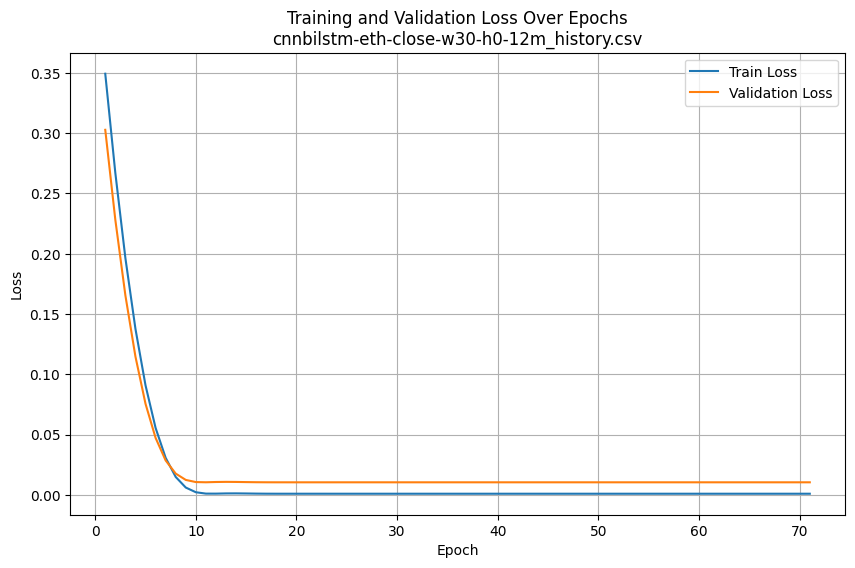

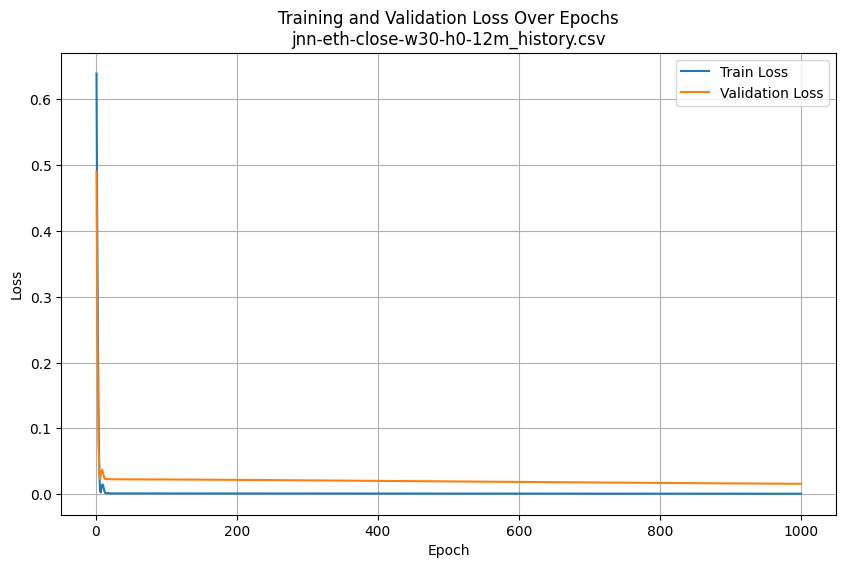

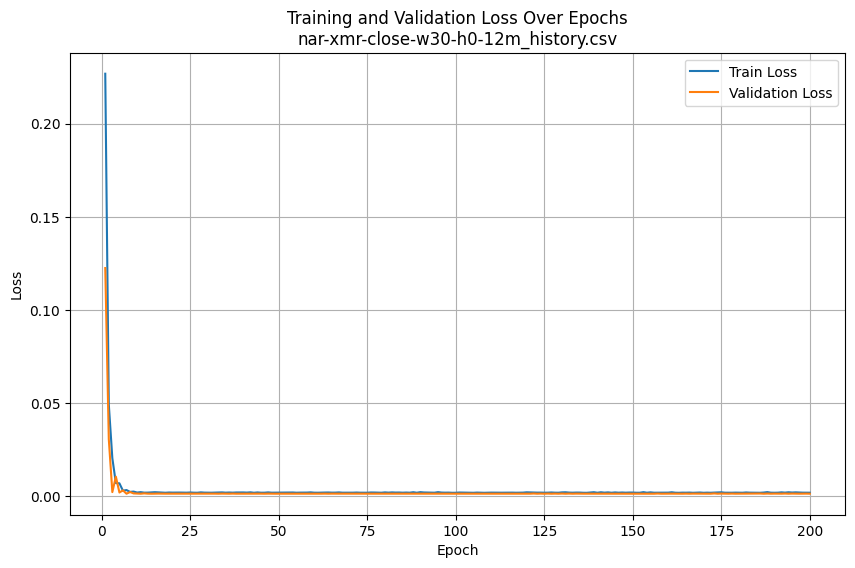

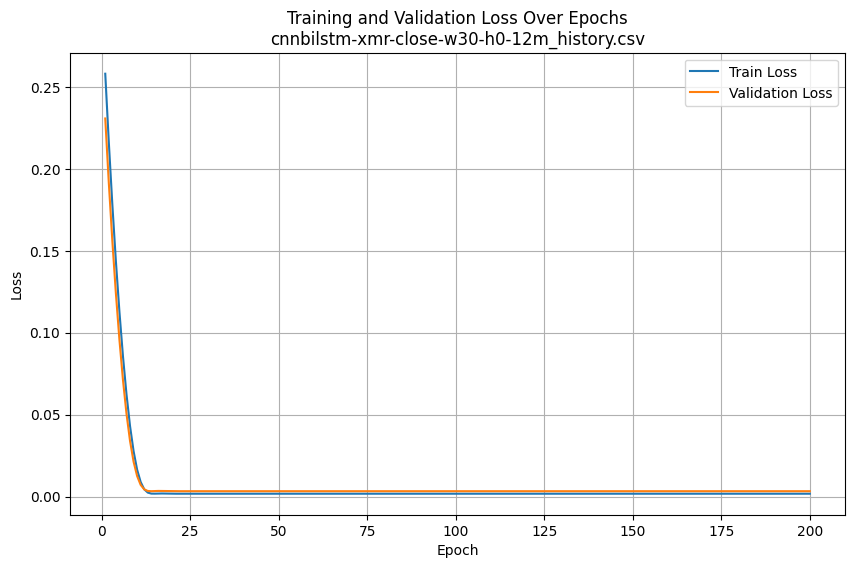

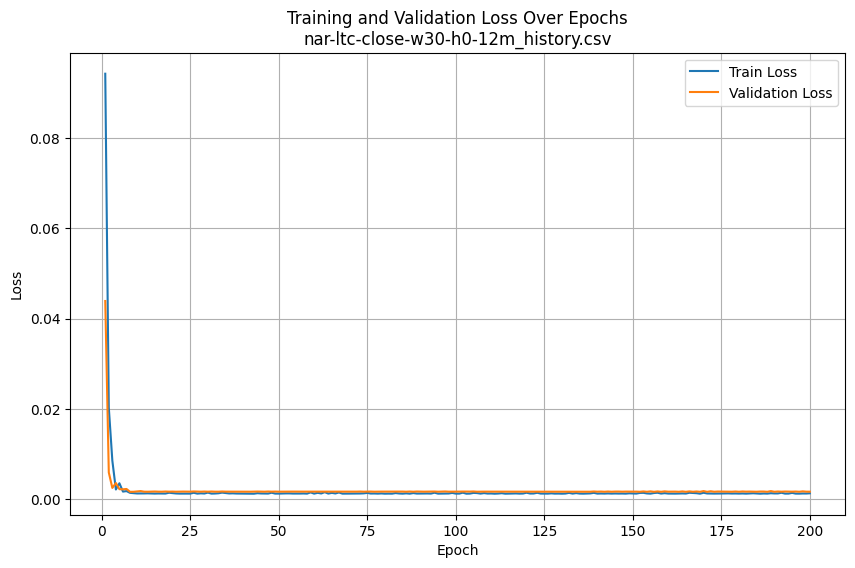

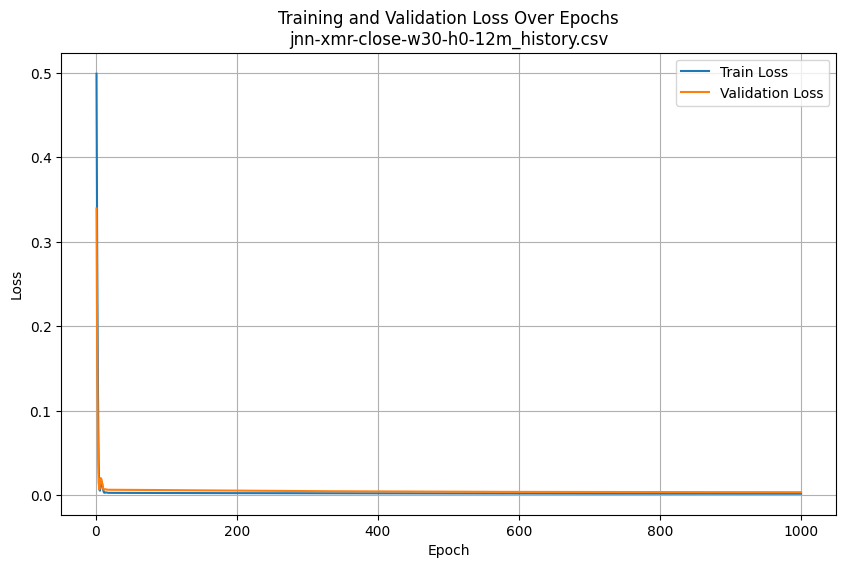

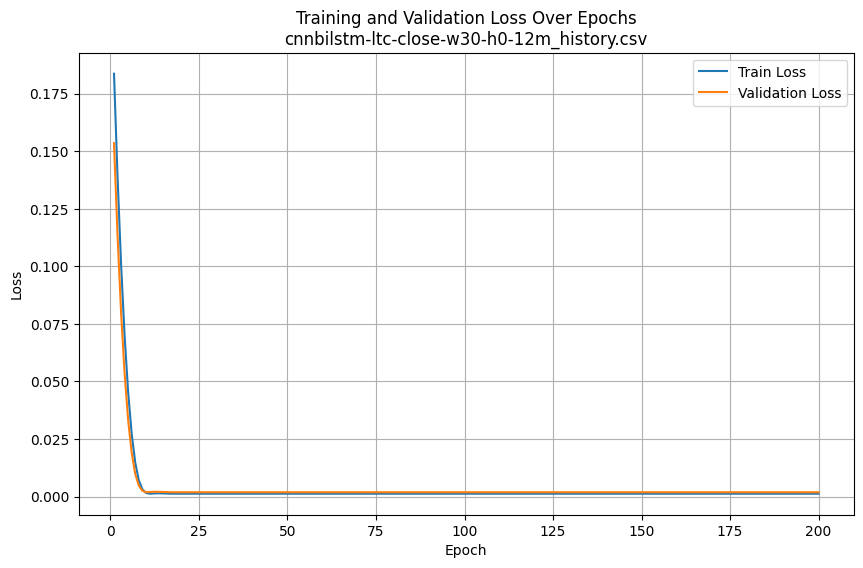

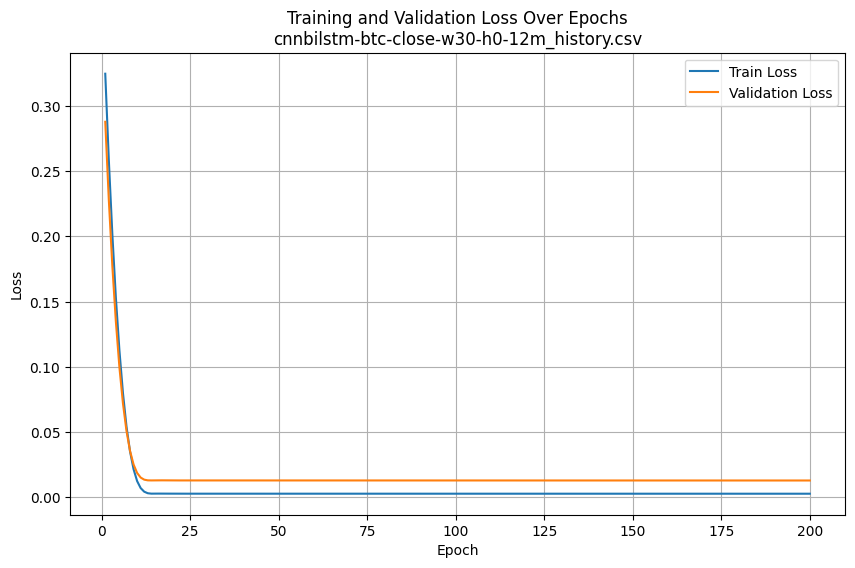

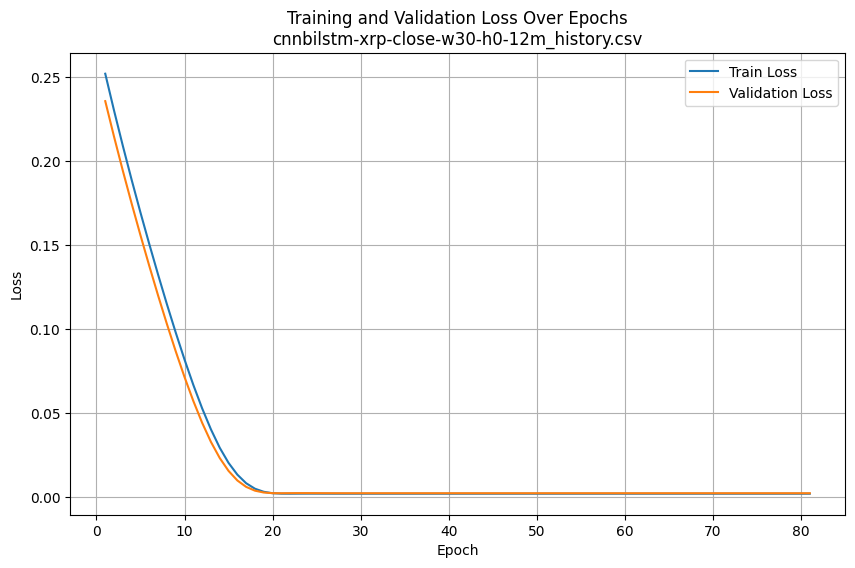

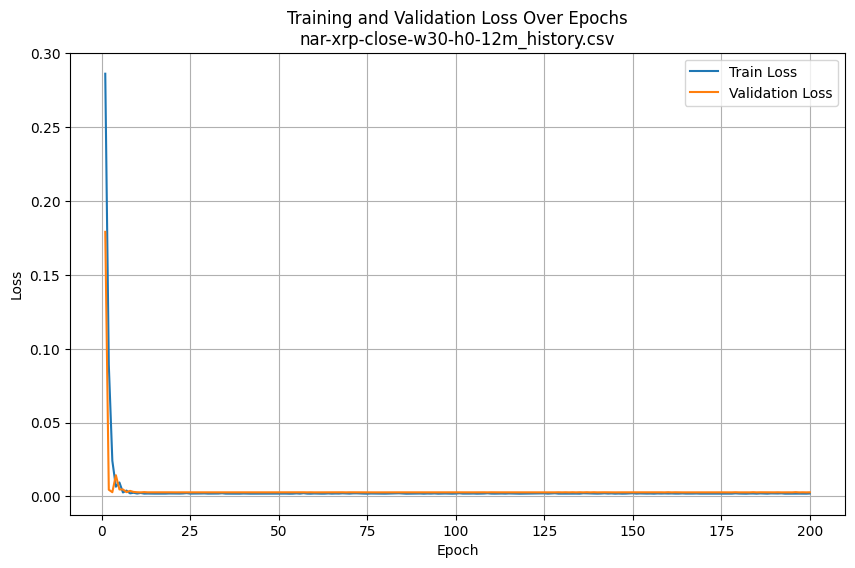

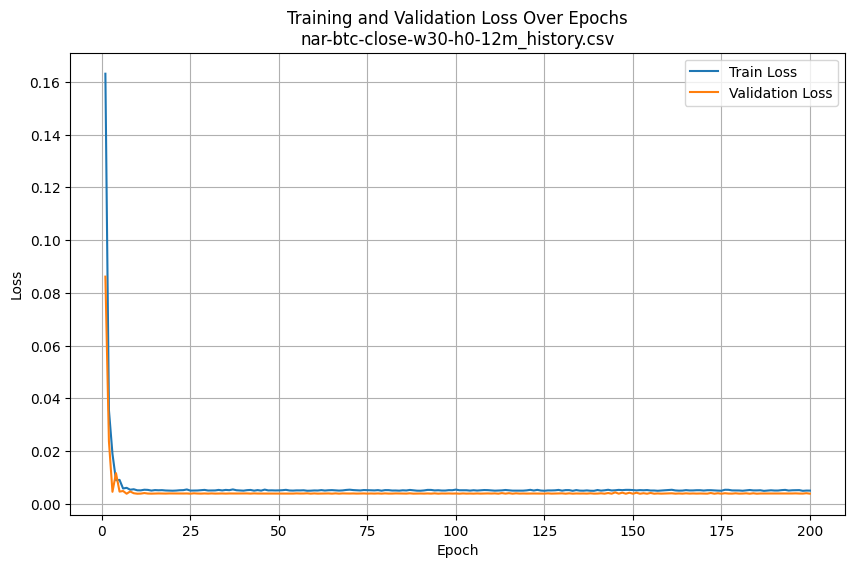

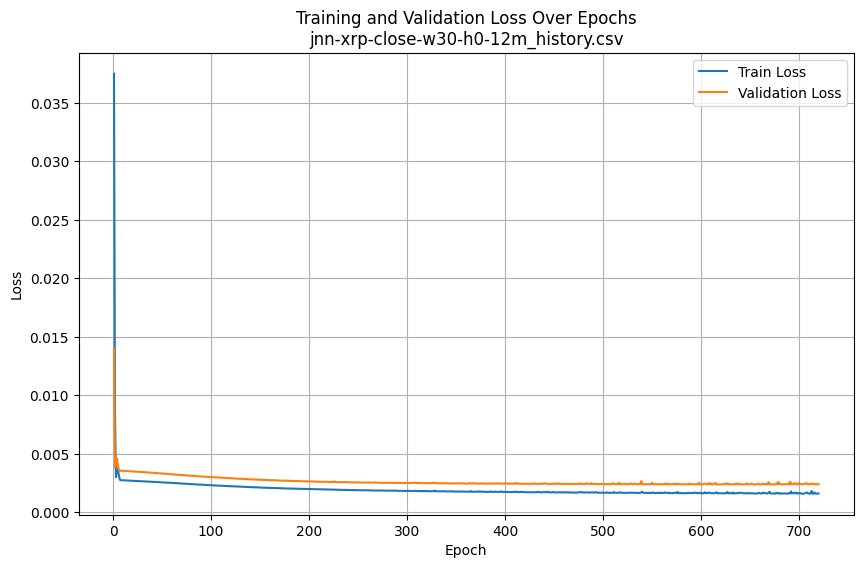

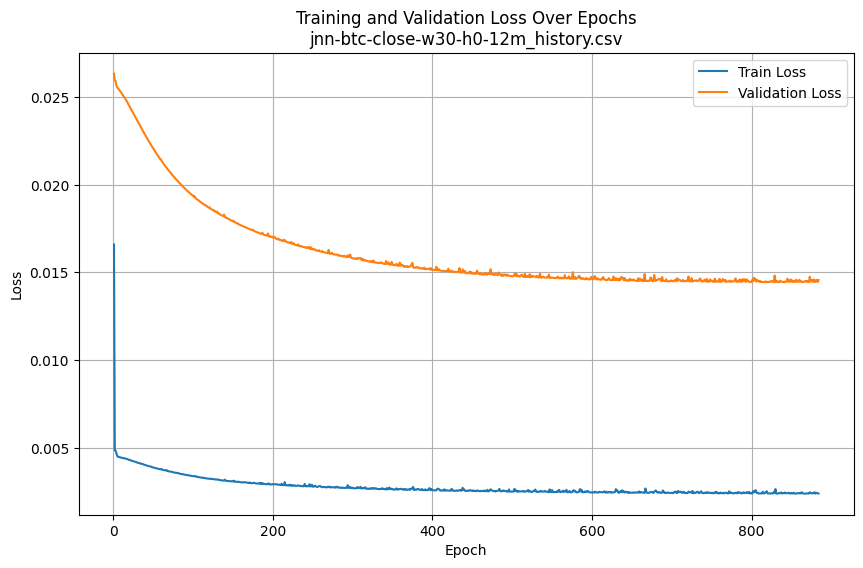

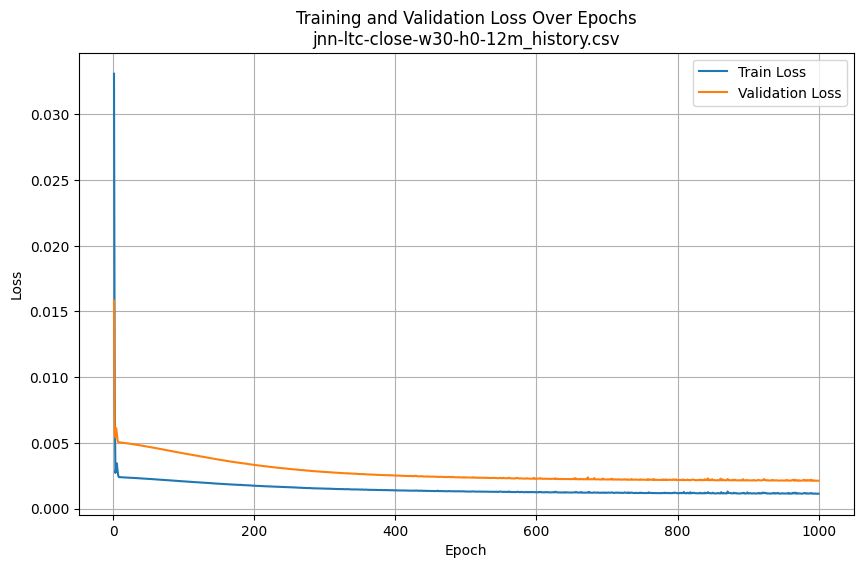

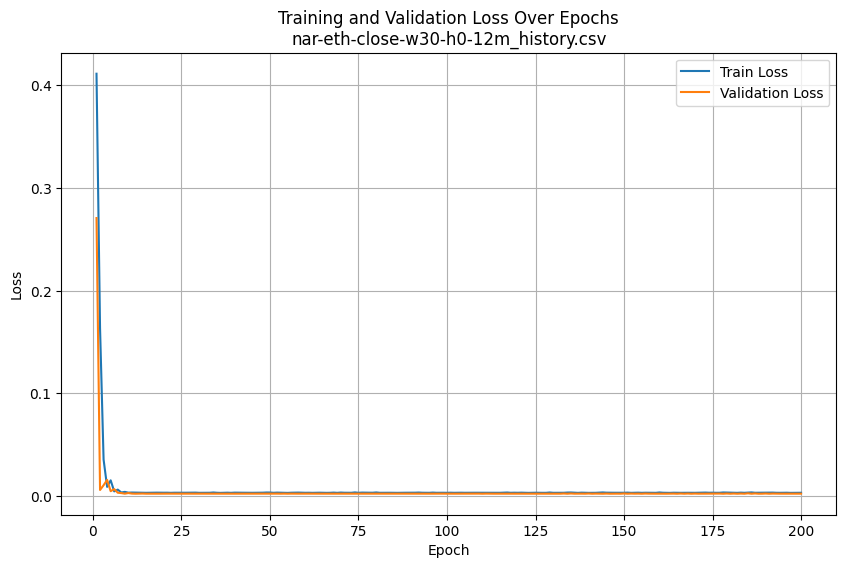

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt


folder_path = 'history/'


for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):

        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)

        plt.figure(figsize=(10, 6))
        plt.plot(df['epoch'], df['train_loss'], label='Train Loss')
        plt.plot(df['epoch'], df['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Training and Validation Loss Over Epochs\n{file_name}')
        plt.legend()
        plt.grid(True)

        # Save the plot as an image file or display it
        plt.savefig(f'{file_name}_loss_plot.png')  # Save plot as an image (optional)
        plt.show()  # Display the plot


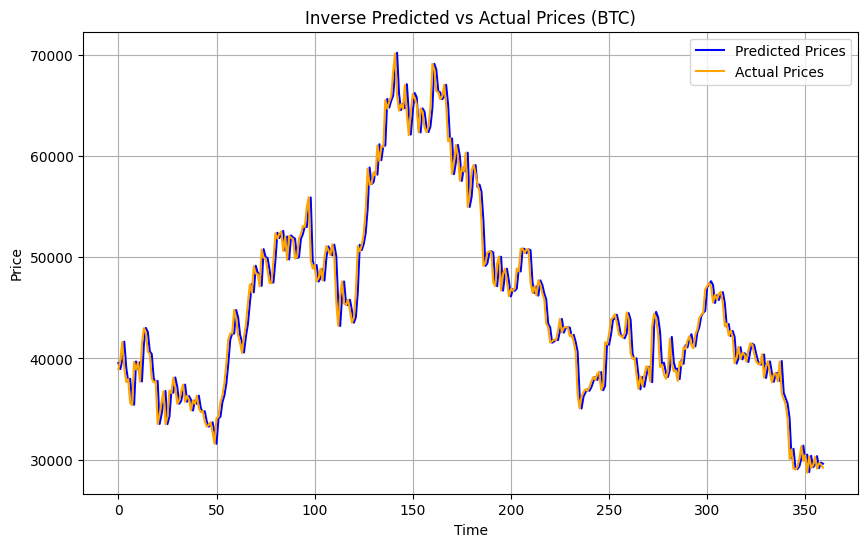

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with normalized predictions and labels
btc_output_df = pd.read_csv('res/output_nar-btc-close-w30-h0-12m.csv')

# Min and Max values from the original dataset (BTC in this case)
min_price = 1914.1
max_price = 67525.83

# Function to inverse the normalization
def inverse_transform(normalized_values, min_price, max_price):
    return normalized_values * (max_price - min_price) + min_price

# Apply inverse transformation to both predicted and actual prices
btc_output_df['predicted_prices'] = inverse_transform(btc_output_df['close'], min_price, max_price)
btc_output_df['actual_prices'] = inverse_transform(btc_output_df['labels'], min_price, max_price)

# Plotting the actual prices and predicted prices
plt.figure(figsize=(10, 6))
plt.plot(btc_output_df['predicted_prices'], label='Predicted Prices', color='blue')
plt.plot(btc_output_df['actual_prices'], label='Actual Prices', color='orange')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Inverse Predicted vs Actual Prices (BTC)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import os
import pandas as pd


metrics_dir = 'res/All models/'


for file_name in os.listdir(metrics_dir):
    if file_name.startswith('metrics_') and file_name.endswith('.csv'):

        file_path = os.path.join(metrics_dir, file_name)
        df = pd.read_csv(file_path)
 
        averages = df.mean()
        

        averages_df = pd.DataFrame(averages).transpose()
        

        name_parts = file_name.split('_')
    
        if len(name_parts) > 1:
            model_and_crypto = name_parts[1].split('-')
            model_name = model_and_crypto[0]  
            crypto_name = model_and_crypto[1] 

            output_file_name = f'average_metrics_{model_name}_{crypto_name}.csv'
            output_file_path = os.path.join(metrics_dir, output_file_name)

            averages_df.to_csv(output_file_path, index=False)
        
            print(f'Saved averages to {output_file_name}')


Saved averages to average_metrics_rf_btc.csv
Saved averages to average_metrics_tft_xmr.csv
Saved averages to average_metrics_tft_eth.csv
Saved averages to average_metrics_lstm_xmr.csv
Saved averages to average_metrics_nar_btc.csv
Saved averages to average_metrics_tcn_eth.csv
Saved averages to average_metrics_cnnbilstm_btc.csv
Saved averages to average_metrics_knn_xmr.csv
Saved averages to average_metrics_rf_xrp.csv
Saved averages to average_metrics_cnnbilstm_ltc.csv
Saved averages to average_metrics_hybrid_xrp.csv
Saved averages to average_metrics_knn_ltc.csv
Saved averages to average_metrics_jnn_ltc.csv
Saved averages to average_metrics_knn_eth.csv
Saved averages to average_metrics_svr_ltc.csv
Saved averages to average_metrics_gru_xrp.csv
Saved averages to average_metrics_arima_eth.csv
Saved averages to average_metrics_tft_xrp.csv
Saved averages to average_metrics_cnnbilstm_xrp.csv
Saved averages to average_metrics_nar_xmr.csv
Saved averages to average_metrics_lstm_btc.csv
Saved avera

In [ ]:
import os
import pandas as pd


directory = "res/All models"

dataframes = []

for filename in os.listdir(directory):
    if filename.startswith("average_metrics") and filename.endswith(".csv"):
        print(f"Processing file: {filename}")  
        

        parts = filename.split("_")
        model_name = parts[2] 
        currency_name = parts[3].replace(".csv", "")  

        file_path = os.path.join(directory, filename)

        try:
            df = pd.read_csv(file_path)
            if df.empty:
                print(f"Warning: {filename} is empty. Skipping.")
                continue
            

            df['model_name'] = model_name
            df['currency_name'] = currency_name
            

            dataframes.append(df)
        except pd.errors.EmptyDataError:
            print(f"Error: {filename} is empty or unreadable. Skipping.")
        except Exception as e:
            print(f"Error reading {filename}: {e}")

if not dataframes:
    print("No valid CSV files were found or read successfully.")
else:

    combined_df = pd.concat(dataframes, ignore_index=True)
    

    combined_df = combined_df.sort_values(by=['currency_name', 'model_name'])
    

    combined_df.to_csv("res/combined_metrics_by_currency_and_model.csv", index=False)

    print("Combined and sorted CSV file created successfully.")


Processing file: average_metrics_tcn_ltc.csv
Processing file: average_metrics_arima_ltc.csv
Processing file: average_metrics_tft_xrp.csv
Processing file: average_metrics_tcn_xrp.csv
Processing file: average_metrics_nar_xmr.csv
Processing file: average_metrics_cnnbilstm_xrp.csv
Processing file: average_metrics_lstnet_xmr.csv
Processing file: average_metrics_jnn_btc.csv
Processing file: average_metrics_arima_btc.csv
Processing file: average_metrics_jnn_ltc.csv
Processing file: average_metrics_knn_xmr.csv
Processing file: average_metrics_gru_btc.csv
Processing file: average_metrics_gru_eth.csv
Processing file: average_metrics_tcn_eth.csv
Processing file: average_metrics_nar_xrp.csv
Processing file: average_metrics_gru_xmr.csv
Processing file: average_metrics_lstm_btc.csv
Processing file: average_metrics_lstnet_eth.csv
Processing file: average_metrics_gru_xrp.csv
Processing file: average_metrics_nar_ltc.csv
Processing file: average_metrics_tft_btc.csv
Processing file: average_metrics_hybri

In [ ]:

combined_csv_path = "res/combined_metrics_by_currency_and_model.csv"


output_directory = "res/models/"
os.makedirs(output_directory, exist_ok=True)  # Create the directory if it doesn't exist

combined_df = pd.read_csv(combined_csv_path)


for model_name, group_df in combined_df.groupby('model_name'):
   
    output_path = os.path.join(output_directory, f"{model_name}_metrics.csv")

    group_df.to_csv(output_path, index=False)
    
    print(f"Created CSV for model: {model_name} at {output_path}")


Created CSV for model: arima at res/models/arima_metrics.csv
Created CSV for model: cnnbilstm at res/models/cnnbilstm_metrics.csv
Created CSV for model: gru at res/models/gru_metrics.csv
Created CSV for model: hybrid at res/models/hybrid_metrics.csv
Created CSV for model: jnn at res/models/jnn_metrics.csv
Created CSV for model: knn at res/models/knn_metrics.csv
Created CSV for model: lstm at res/models/lstm_metrics.csv
Created CSV for model: lstnet at res/models/lstnet_metrics.csv
Created CSV for model: nar at res/models/nar_metrics.csv
Created CSV for model: rf at res/models/rf_metrics.csv
Created CSV for model: svr at res/models/svr_metrics.csv
Created CSV for model: tcn at res/models/tcn_metrics.csv
Created CSV for model: tft at res/models/tft_metrics.csv


In [ ]:
import pandas as pd


file_paths = [
    '/home/estella/Projects/tsa_crt/res/models/tft_metrics.csv',
    '/home/estella/Projects/tsa_crt/res/models/svr_metrics.csv',
    '/home/estella/Projects/tsa_crt/res/models/tcn_metrics.csv',
    '/home/estella/Projects/tsa_crt/res/models/rf_metrics.csv',
    '/home/estella/Projects/tsa_crt/res/models/nar_metrics.csv',
    '/home/estella/Projects/tsa_crt/res/models/lstnet_metrics.csv',
    '/home/estella/Projects/tsa_crt/res/models/lstm_metrics.csv',
    '/home/estella/Projects/tsa_crt/res/models/knn_metrics.csv',
    '/home/estella/Projects/tsa_crt/res/models/jnn_metrics.csv',
    '/home/estella/Projects/tsa_crt/res/models/hybrid_metrics.csv',
    '/home/estella/Projects/tsa_crt/res/models/gru_metrics.csv',
    '/home/estella/Projects/tsa_crt/res/models/cnnbilstm_metrics.csv',
    '/home/estella/Projects/tsa_crt/res/models/arima_metrics.csv'
]


data_frames = {}
for file in file_paths:
    df = pd.read_csv(file)
    file_name = file.split('/')[-1]
    data_frames[file_name] = df


model_performance = {}

for file_name, df in data_frames.items():

    grouped = df.groupby('model_name').mean(numeric_only=True)
    model_name = grouped.index[0] 
    model_performance[model_name] = grouped[['MSE', 'MAE', 'RMSE', 'MAPE', 'R2']].mean()


performance_comparison_df = pd.DataFrame(model_performance).T
performance_comparison_df = performance_comparison_df.sort_values(by='MSE')


print(performance_comparison_df)


                MSE       MAE      RMSE      MAPE        R2
lstm       0.000565  0.017329  0.022223  0.038643  0.735317
cnnbilstm  0.000571  0.017275  0.022317  0.039534  0.720555
nar        0.000588  0.017506  0.022768  0.040227  0.709905
hybrid     0.000590  0.017578  0.022712  0.039184  0.723600
gru        0.000593  0.017534  0.022743  0.039077  0.723136
knn        0.000621  0.017916  0.023322  0.040030  0.711385
tcn        0.000621  0.017980  0.023338  0.040181  0.710741
lstnet     0.000622  0.017970  0.023359  0.040205  0.711074
arima      0.000626  0.017972  0.023426  0.040102  0.707629
tft        0.000629  0.018052  0.023523  0.040457  0.705725
rf         0.000660  0.018362  0.024002  0.040850  0.694735
svr        0.000688  0.018907  0.024524  0.042405  0.680619
jnn        0.000743  0.019890  0.025326  0.045491  0.634616


In [ ]:



folder_path = '/home/estella/Projects/tsa_crt/history/'  


for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)

        try:

            df = pd.read_csv(file_path)

            if 'epoch' in df.columns and 'train_loss' in df.columns and 'val_loss' in df.columns:
                # Plotting
                plt.figure(figsize=(10, 6))
                plt.plot(df['epoch'], df['train_loss'], label='Train Loss')
                plt.plot(df['epoch'], df['val_loss'], label='Validation Loss')
                plt.xlabel('Epoch')
                plt.ylabel('Loss')
                plt.title(f'Training and Validation Loss Over Epochs\n{file_name}')
                plt.legend()
                plt.grid(True)

                plot_filename = f"{file_name.split('.')[0]}_loss_plot.png"
                plot_path = os.path.join(folder_path, plot_filename)
                plt.savefig(plot_path)
                plt.close() 

                print(f"Plot created and saved for {file_name} as {plot_filename}")
            else:
                print(f"Skipping {file_name}: Required columns not found")
        except Exception as e:
            print(f"Error processing {file_name}: {e}")


In [10]:

file_path = '/home/estella/Projects/tsa_crt/saved_data/Bitcoin Historical Data.csv'
df = pd.read_csv(file_path)


print(df.head())


min_values = df.min()
max_values = df.max()

print("Minimum values:\n", min_values)
print("Maximum values:\n", max_values)

   Unnamed: 0        date    open    high     low   close   timestamp  volume
0           0  01/06/2017  2303.3  2460.8  2303.3  2412.6  1496275200  122700
1           1  02/06/2017  2412.6  2494.0  2385.6  2492.6  1496361600   83030
2           2  03/06/2017  2492.6  2582.8  2449.9  2545.4  1496448000   70960
3           3  04/06/2017  2545.4  2559.8  2478.2  2524.1  1496534400   59480
4           4  05/06/2017  2524.1  2705.4  2523.9  2705.0  1496620800   86690
Minimum values:
 Unnamed: 0             0
date          01/01/2018
open              1914.1
high              2044.4
low               1809.0
close             1914.1
timestamp     1496275200
volume               260
dtype: object
Maximum values:
 Unnamed: 0          1825
date          31/12/2021
open            67525.82
high             69000.0
low              66222.4
close           67525.83
timestamp     1653955200
volume        4470000000
dtype: object


In [12]:

file_path = "/home/estella/Projects/tsa_crt/res/combined_metrics_by_currency_and_model.csv"


df = pd.read_csv(file_path)


df_sorted = df.sort_values(by='MSE')


print(df_sorted)


output_file_path = "/home/estella/Projects/tsa_crt/res/sorted_combined_metrics.csv"
df_sorted.to_csv(output_file_path, index=False)

    Unnamed: 0       MSE       MAE      RMSE      MAPE        R2 model_name  \
58         5.5  0.000257  0.011247  0.014919  0.043695  0.719730       lstm   
54         5.5  0.000265  0.011344  0.015180  0.043936  0.708772        gru   
55         5.5  0.000265  0.011393  0.015213  0.044174  0.707749     hybrid   
53         5.5  0.000269  0.011429  0.015310  0.044577  0.703695  cnnbilstm   
57         5.5  0.000276  0.011547  0.015558  0.045152  0.694105        knn   
..         ...       ...       ...       ...       ...       ...        ...   
25         5.5  0.001075  0.025382  0.031970  0.035437  0.725706        tft   
13         5.5  0.001077  0.025294  0.031970  0.035340  0.725901      arima   
22         5.5  0.001157  0.025936  0.033177  0.036159  0.706483         rf   
23         5.5  0.001234  0.027480  0.034189  0.038384  0.686467        svr   
17         5.5  0.001386  0.028745  0.035827  0.043050  0.587076        jnn   

   currency_name  
58           xrp  
54           

In [14]:

cnnbilstm_df = pd.read_csv('/home/estella/Projects/tsa_crt/res/4models/chyB1_metrics.csv')
lstnet_df = pd.read_csv('/home/estella/Projects/tsa_crt/res/4models/chyB2_metrics.csv')
nar_df = pd.read_csv('/home/estella/Projects/tsa_crt/res/4models/chyb3_metrics.csv')
jnn_df = pd.read_csv('/home/estella/Projects/tsa_crt/res/4models/chyb4_metrics.csv')


combined_df = pd.concat([cnnbilstm_df, lstnet_df, nar_df, jnn_df])

sorted_df = combined_df.sort_values(by='MSE')

sorted_df.to_csv('/home/estella/Projects/tsa_crt/res/4models/sorted_metrics_by_mse.csv', index=False)

In [10]:

file_path = '/home/estella/Projects/tsa_crt/saved_data/combined_metrics_by_currency_and_model.csv'  
df = pd.read_csv(file_path)


df['RMSE'] = pd.to_numeric(df['RMSE'], errors='coerce')


df_rmse = df.pivot_table(index='model_name', columns='currency_name', values='RMSE').reset_index()


df_rmse['Average RMSE'] = df_rmse.mean(axis=1, skipna=True)


columns = ['model_name', 'btc', 'eth', 'ltc', 'xmr', 'xrp', 'Average RMSE']
df_final = df_rmse.reindex(columns=columns, fill_value='')


output_path = '/home/estella/Projects/tsa_crt/saved_data/model_rmse_table.csv' 
df_final.to_csv(output_path, index=False)


print(df_final)


TypeError: can only concatenate str (not "float") to str

In [11]:

file_path = '/home/estella/Projects/tsa_crt/saved_data/combined_metrics_by_currency_and_model.csv'  
df = pd.read_csv(file_path)


df_rmse = df.pivot_table(index='model_name', columns='currency_name', values='RMSE').reset_index()


df_rmse['Average RMSE'] = df_rmse.mean(axis=1)


columns = ['model_name', 'btc', 'eth', 'ltc', 'xmr', 'xrp', 'Average RMSE']
df_final = df_rmse[columns]

output_path = '/home/estella/Projects/tsa_crt/saved_data/model_rmse_table.csv' 
df_final.to_csv(output_path, index=False)

print(df_final)


TypeError: can only concatenate str (not "float") to str

In [12]:

file_path = '/home/estella/Projects/tsa_crt/saved_data/combined_metrics_by_currency_and_model.csv'  # Replace with your correct file path
df = pd.read_csv(file_path)


df_pivot = df.pivot_table(index='model_name', columns='currency_name', values='RMSE').reset_index()


df_pivot.columns.name = None  
df_pivot.rename(columns={'model_name': 'Model', 'btc': 'BTC', 'eth': 'ETH', 'ltc': 'LTC', 'xmr': 'XMR', 'xrp': 'XRP'}, inplace=True)


output_path = '/home/estella/Projects/tsa_crt/saved_data/model_rmse_table.csv' 
df_pivot.to_csv(output_path, index=False)


print(df_pivot)


        Model       BTC       ETH       LTC       XMR       XRP
0       arima  0.025134  0.031970  0.019791  0.024449  0.015785
1   cnnbilstm  0.023436  0.029305  0.019511  0.024025  0.015310
2         gru  0.024351  0.030872  0.019243  0.024071  0.015180
3      hybrid  0.024348  0.030844  0.019273  0.023882  0.015213
4         jnn  0.024872  0.035827  0.021953  0.026916  0.017063
5         knn  0.024956  0.031878  0.019749  0.024468  0.015558
6        lstm  0.023729  0.030338  0.018634  0.023494  0.014919
7      lstnet  0.024987  0.031857  0.019777  0.024514  0.015661
8         nar  0.024213  0.029590  0.019921  0.024421  0.015696
9          rf  0.026011  0.033177  0.019971  0.025245  0.015604
10        svr  0.024828  0.034189  0.020753  0.026806  0.016042
11        tcn  0.025017  0.031867  0.019730  0.024468  0.015611
12        tft  0.025093  0.031970  0.020299  0.024593  0.015663


In [13]:

file_path = '/home/estella/Projects/tsa_crt/saved_data/combined_metrics_by_currency_and_model.csv'  
df = pd.read_csv(file_path)


df_pivot = df.pivot_table(index='model_name', columns='currency_name', values='RMSE').reset_index()


df_pivot.columns.name = None  
df_pivot.rename(columns={'model_name': 'Model', 'btc': 'BTC', 'eth': 'ETH', 'ltc': 'LTC', 'xmr': 'XMR', 'xrp': 'XRP'}, inplace=True)

df_pivot['Average RMSE'] = df_pivot[['BTC', 'ETH', 'LTC', 'XMR', 'XRP']].mean(axis=1)


output_path = '/home/estella/Projects/tsa_crt/saved_data/output_table_with_average.csv'  # Replace with your correct file path
df_pivot.to_csv(output_path, index=False)

print(df_pivot)


        Model       BTC       ETH       LTC       XMR       XRP  Average RMSE
0       arima  0.025134  0.031970  0.019791  0.024449  0.015785      0.023426
1   cnnbilstm  0.023436  0.029305  0.019511  0.024025  0.015310      0.022317
2         gru  0.024351  0.030872  0.019243  0.024071  0.015180      0.022743
3      hybrid  0.024348  0.030844  0.019273  0.023882  0.015213      0.022712
4         jnn  0.024872  0.035827  0.021953  0.026916  0.017063      0.025326
5         knn  0.024956  0.031878  0.019749  0.024468  0.015558      0.023322
6        lstm  0.023729  0.030338  0.018634  0.023494  0.014919      0.022223
7      lstnet  0.024987  0.031857  0.019777  0.024514  0.015661      0.023359
8         nar  0.024213  0.029590  0.019921  0.024421  0.015696      0.022768
9          rf  0.026011  0.033177  0.019971  0.025245  0.015604      0.024002
10        svr  0.024828  0.034189  0.020753  0.026806  0.016042      0.024524
11        tcn  0.025017  0.031867  0.019730  0.024468  0.015611 

In [15]:

file_path = '/home/estella/Projects/tsa_crt/saved_data/combined_metrics_by_currency_and_model.csv'  # Replace with your correct file path
df = pd.read_csv(file_path)


df_pivot = df.pivot_table(index='model_name', columns='currency_name', values='RMSE').reset_index()


df_pivot.columns.name = None
df_pivot.rename(columns={'model_name': 'Model', 'btc': 'BTC', 'eth': 'ETH', 'ltc': 'LTC', 'xmr': 'XMR', 'xrp': 'XRP'}, inplace=True)


df_pivot['Average RMSE'] = df_pivot[['BTC', 'ETH', 'LTC', 'XMR', 'XRP']].mean(axis=1)


df_pivot['BTC Rank'] = df_pivot['BTC'].rank(ascending=True, method='min')
df_pivot['ETH Rank'] = df_pivot['ETH'].rank(ascending=True, method='min')
df_pivot['LTC Rank'] = df_pivot['LTC'].rank(ascending=True, method='min')
df_pivot['XMR Rank'] = df_pivot['XMR'].rank(ascending=True, method='min')
df_pivot['XRP Rank'] = df_pivot['XRP'].rank(ascending=True, method='min')
df_pivot['Average Rank'] = df_pivot['Average RMSE'].rank(ascending=True, method='min')


output_path = '/home/estella/Projects/tsa_crt/saved_data/output_table_with_rankings.csv' 
df_pivot.to_csv(output_path, index=False)


print(df_pivot)


        Model       BTC       ETH       LTC       XMR       XRP  Average RMSE  \
0       arima  0.025134  0.031970  0.019791  0.024449  0.015785      0.023426   
1   cnnbilstm  0.023436  0.029305  0.019511  0.024025  0.015310      0.022317   
2         gru  0.024351  0.030872  0.019243  0.024071  0.015180      0.022743   
3      hybrid  0.024348  0.030844  0.019273  0.023882  0.015213      0.022712   
4         jnn  0.024872  0.035827  0.021953  0.026916  0.017063      0.025326   
5         knn  0.024956  0.031878  0.019749  0.024468  0.015558      0.023322   
6        lstm  0.023729  0.030338  0.018634  0.023494  0.014919      0.022223   
7      lstnet  0.024987  0.031857  0.019777  0.024514  0.015661      0.023359   
8         nar  0.024213  0.029590  0.019921  0.024421  0.015696      0.022768   
9          rf  0.026011  0.033177  0.019971  0.025245  0.015604      0.024002   
10        svr  0.024828  0.034189  0.020753  0.026806  0.016042      0.024524   
11        tcn  0.025017  0.0

In [16]:
import pandas as pd

# Load the data
file_path = '/home/estella/Projects/tsa_crt/saved_data/combined_metrics_by_currency_and_model.csv' 
df = pd.read_csv(file_path)


df_pivot = df.pivot_table(index='model_name', columns='currency_name', values='RMSE').reset_index()


df_pivot.columns.name = None  #
df_pivot.rename(columns={'model_name': 'Model', 'btc': 'BTC', 'eth': 'ETH', 'ltc': 'LTC', 'xmr': 'XMR', 'xrp': 'XRP'}, inplace=True)


df_pivot['Average'] = df_pivot[['BTC', 'ETH', 'LTC', 'XMR', 'XRP']].mean(axis=1)


df_pivot['BTC Rank'] = df_pivot['BTC'].rank(ascending=True, method='min')
df_pivot['ETH Rank'] = df_pivot['ETH'].rank(ascending=True, method='min')
df_pivot['LTC Rank'] = df_pivot['LTC'].rank(ascending=True, method='min')
df_pivot['XMR Rank'] = df_pivot['XMR'].rank(ascending=True, method='min')
df_pivot['XRP Rank'] = df_pivot['XRP'].rank(ascending=True, method='min')
df_pivot['Average Rank'] = df_pivot['Average'].rank(ascending=True, method='min')


df_pivot['BTC'] = df_pivot.apply(lambda x: f"{x['BTC']:.4f} ({int(x['BTC Rank'])})", axis=1)
df_pivot['ETH'] = df_pivot.apply(lambda x: f"{x['ETH']:.4f} ({int(x['ETH Rank'])})", axis=1)
df_pivot['LTC'] = df_pivot.apply(lambda x: f"{x['LTC']:.4f} ({int(x['LTC Rank'])})", axis=1)
df_pivot['XMR'] = df_pivot.apply(lambda x: f"{x['XMR']:.4f} ({int(x['XMR Rank'])})", axis=1)
df_pivot['XRP'] = df_pivot.apply(lambda x: f"{x['XRP']:.4f} ({int(x['XRP Rank'])})", axis=1)
df_pivot['Average'] = df_pivot.apply(lambda x: f"{x['Average']:.4f} ({int(x['Average Rank'])})", axis=1)


df_final = df_pivot[['Model', 'BTC', 'ETH', 'LTC', 'XMR', 'XRP', 'Average']]


output_path = '/home/estella/Projects/tsa_crt/saved_data/output_table_with_rmse_and_ranks.csv'  
df_final.to_csv(output_path, index=False)


print(df_final)


        Model          BTC          ETH          LTC          XMR  \
0       arima  0.0251 (12)  0.0320 (10)   0.0198 (8)   0.0244 (6)   
1   cnnbilstm   0.0234 (1)   0.0293 (1)   0.0195 (4)   0.0240 (3)   
2         gru   0.0244 (5)   0.0309 (5)   0.0192 (2)   0.0241 (4)   
3      hybrid   0.0243 (4)   0.0308 (4)   0.0193 (3)   0.0239 (2)   
4         jnn   0.0249 (7)  0.0358 (13)  0.0220 (13)  0.0269 (13)   
5         knn   0.0250 (8)   0.0319 (8)   0.0197 (6)   0.0245 (8)   
6        lstm   0.0237 (2)   0.0303 (3)   0.0186 (1)   0.0235 (1)   
7      lstnet   0.0250 (9)   0.0319 (6)   0.0198 (7)   0.0245 (9)   
8         nar   0.0242 (3)   0.0296 (2)   0.0199 (9)   0.0244 (5)   
9          rf  0.0260 (13)  0.0332 (11)  0.0200 (10)  0.0252 (11)   
10        svr   0.0248 (6)  0.0342 (12)  0.0208 (12)  0.0268 (12)   
11        tcn  0.0250 (10)   0.0319 (7)   0.0197 (5)   0.0245 (7)   
12        tft  0.0251 (11)   0.0320 (9)  0.0203 (11)  0.0246 (10)   

            XRP      Average  
0 